In [1]:
import pandas as pd
import numpy as np
import scipy as sci
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer

import re, nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()

from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv('updated_data.csv')

In [3]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [4]:
df.shape

(515738, 17)

In [5]:
df.dtypes

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object

In [6]:
df.isnull().sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
dtype: int64

In [7]:
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.435522,2.884846
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.461022,4.653161
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214066,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.019886
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.841163
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


## EXPLORING THE COLUMNS

In [8]:
list(df.columns)

['Hotel_Address',
 'Additional_Number_of_Scoring',
 'Review_Date',
 'Average_Score',
 'Hotel_Name',
 'Reviewer_Nationality',
 'Negative_Review',
 'Review_Total_Negative_Word_Counts',
 'Total_Number_of_Reviews',
 'Positive_Review',
 'Review_Total_Positive_Word_Counts',
 'Total_Number_of_Reviews_Reviewer_Has_Given',
 'Reviewer_Score',
 'Tags',
 'days_since_review',
 'lat',
 'lng']

### Hotel Name

In [9]:
df.Hotel_Name.nunique()

1492

### Average Score

In [10]:
df['Average_Score'].describe()

count    515738.000000
mean          8.397487
std           0.548048
min           5.200000
25%           8.100000
50%           8.400000
75%           8.800000
max           9.800000
Name: Average_Score, dtype: float64

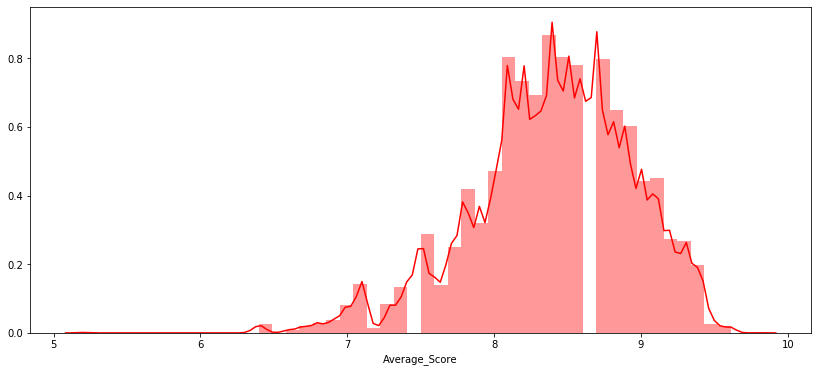

In [11]:
plt.figure(figsize = (14,6))
sns.distplot(df['Average_Score'], color= 'red')

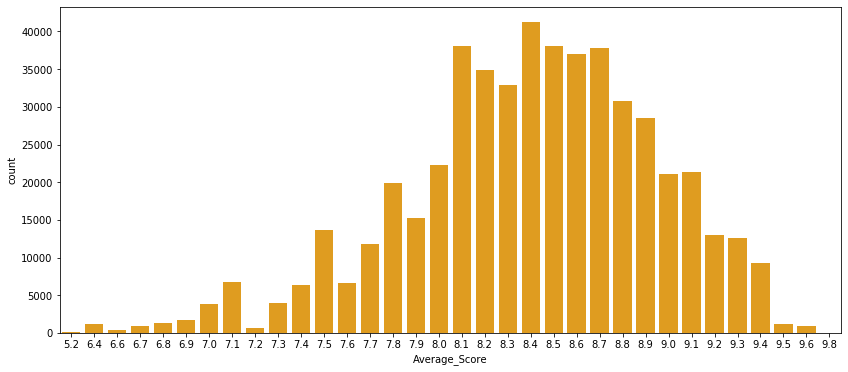

In [12]:
plt.figure(figsize = (14,6))
sns.countplot(x = 'Average_Score',data = df, color= 'orange')

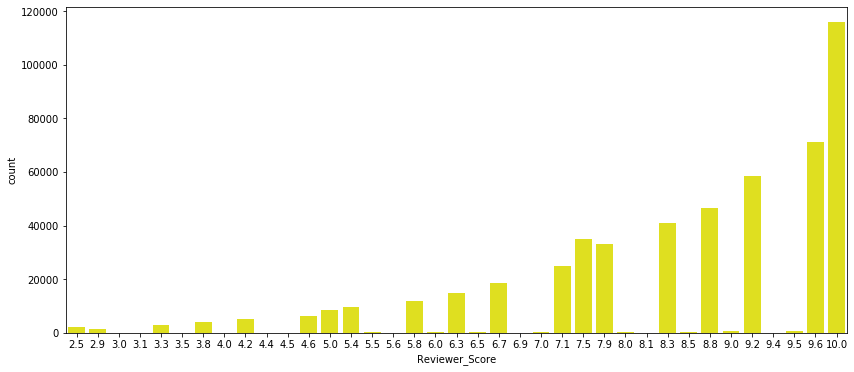

In [13]:
plt.figure(figsize = (14,6))
sns.countplot(x = 'Reviewer_Score',data= df, color= 'yellow')

In [14]:
#Worst Hotels
worst_hotels =df.groupby('Hotel_Name')['Average_Score'].mean().sort_values(ascending=True).head(10)

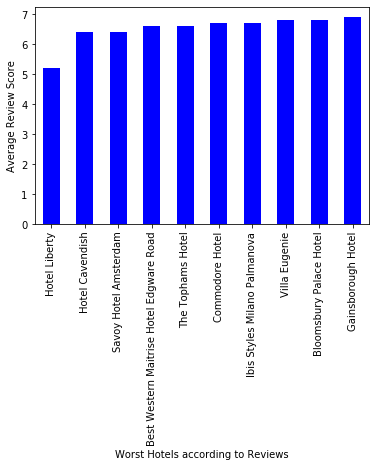

In [15]:
worst_hotels.plot(kind="bar",color="blue")
_=plt.xlabel('Worst Hotels according to Reviews')
_=plt.ylabel('Average Review Score')
plt.show()

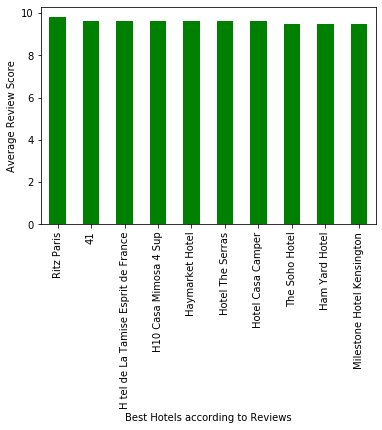

In [16]:
#Best Hotels
best_hotels = df.groupby('Hotel_Name')['Average_Score'].mean().sort_values(ascending=False).head(10)
best_hotels.plot(kind="bar",color = "Green")
_=plt.xlabel('Best Hotels according to Reviews')
_=plt.ylabel('Average Review Score')
plt.show()


In [17]:
#replace United Kingdom in Hote Address Column with UK
df.Hotel_Address = df.Hotel_Address.str.replace('United Kingdom','UK')
df['Country'] = df.Hotel_Address.apply(lambda x: x.split(' ')[-1]).str.strip()

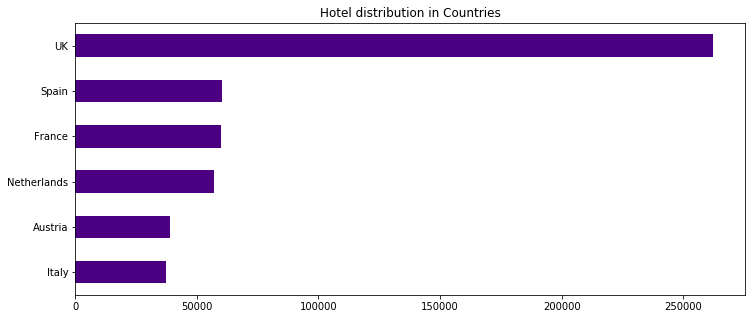

In [18]:
# Now we can check distribution in  and in state
plt.figure(figsize = (12,5))
plt.title('Hotel distribution in Countries')
df.Country.value_counts().sort_values().plot.barh(color = 'indigo')

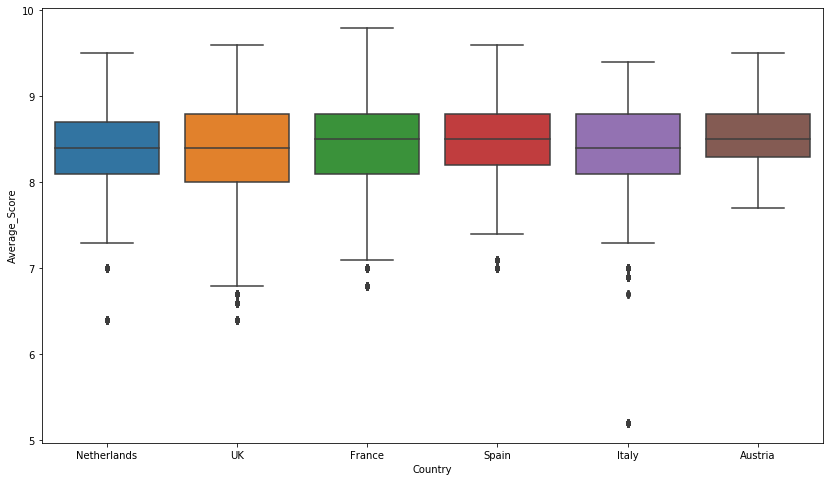

In [19]:
#Initiate a boxplot to show average scores by countries
plt.figure(figsize = (14,8))
sns.boxplot(x = 'Country', y = 'Average_Score', data=df)

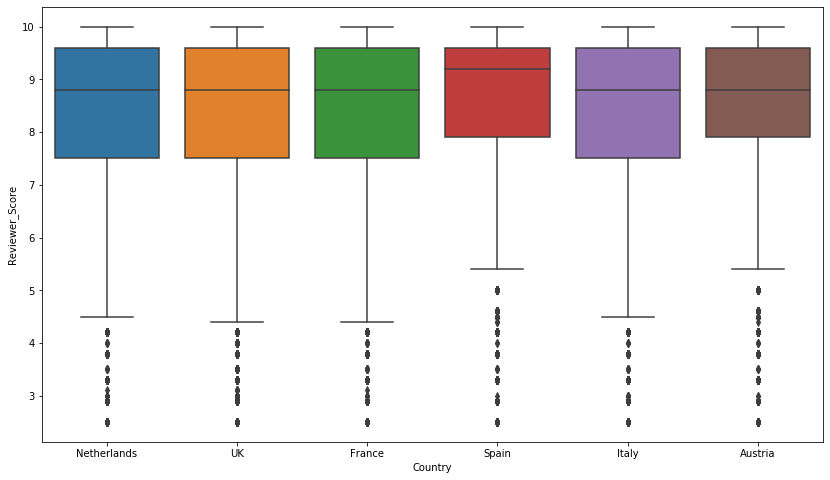

In [20]:
#Intitate a boxplot to show reviewer score by country
plt.figure(figsize = (14,8))
sns.boxplot(x = 'Country', y = 'Reviewer_Score', data=df)

In [21]:
df['City']= df.Hotel_Address.apply(lambda x: x.split(' ')[-2])

In [22]:
df[(df.Average_Score >= 9.0) & (df.City == 'Amsterdam')][['Hotel_Name','Average_Score']].drop_duplicates().sort_values(by ='Average_Score',ascending = False)[:10]

,Hotel_Name,Average_Score
341657,Waldorf Astoria Amsterdam,9.5
270116,Pillows Anna van den Vondel Amsterdam,9.4
356072,The Toren,9.4
393386,Luxury Suites Amsterdam,9.3
421334,Andaz Amsterdam Prinsengracht A Hyatt Hotel,9.3
340344,The Hoxton Amsterdam,9.3
340753,Ambassade Hotel,9.3
355888,Canal House,9.3
393615,Sofitel Legend The Grand Amsterdam,9.2
469602,Conservatorium Hotel,9.2


In [23]:
#Check hotels with highest reviews in paris
df[(df.Average_Score >= 9.0) & (df.City == 'Paris')][['Hotel_Name','Average_Score']].drop_duplicates().sort_values(by ='Average_Score',ascending = False)[:10]

,Hotel_Name,Average_Score
54717,Ritz Paris,9.8
176997,H tel de La Tamise Esprit de France,9.6
81101,Le Narcisse Blanc Spa,9.5
81043,Hotel The Peninsula Paris,9.5
62183,Nolinski Paris,9.4
78350,Splendide Royal Paris,9.4
152204,H tel D Aubusson,9.4
214806,Hotel Monge,9.4
234755,Goralska R sidences H tel Paris Bastille,9.4
245310,Hotel Eiffel Blomet,9.4


In [24]:
top_reviwed_countries = df.groupby('Country')['Average_Score'].mean().to_frame().reset_index().sort_values('Average_Score', ascending = False)


**It is possible for residents in the Hotels' location Country to be more critical of their hotels, or vice versa. Let's explore this.**

In [25]:
#Replace 'United Kingdom' in Reviewer_Nationality column with 'UK'. we need it to correspond with Hotel Addrss so asto classify reviewers as rither tourists or residents
df.Reviewer_Nationality = df.Reviewer_Nationality.str.replace(' United Kingdom ','UK')
df.Reviewer_Nationality = df.Reviewer_Nationality.str.strip()

In [26]:
#Find all instances where reviwer nationality matches hotel address and append 'Citizen' to it, else append 'tourist'.
df['tourist']= np.where(df['Reviewer_Nationality']==df['Country'],'Citizen', 'Tourist')

In [27]:
Country_bias = df.groupby(['Country','tourist'])[['Average_Score']].mean().reset_index()
Country_bias = Country_bias.pivot(index='Country', columns='tourist', values='Average_Score').reset_index()

In [28]:
Country_bias

tourist,Country,Citizen,Tourist
0,Austria,8.482940,8.559876
1,France,8.323978,8.411778
2,Italy,8.298277,8.431941
3,Netherlands,8.359838,8.387936
4,Spain,8.403656,8.526441
5,UK,8.351289,8.320106


<Figure size 1008x576 with 0 Axes>

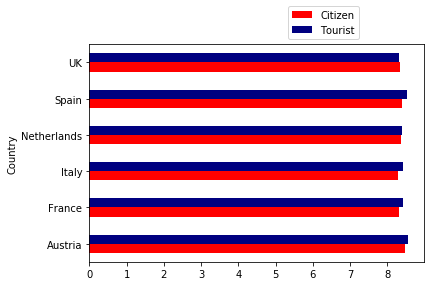

In [29]:
plt.figure(figsize = (14,8))
Country_bias.plot.barh(x='Country', stacked =False, color =['red', 'navy'],title = '')
plt.legend(bbox_to_anchor=(0.7, 1), loc='lower center')

**with UK being the only exception, tourists give higher scores on average.**

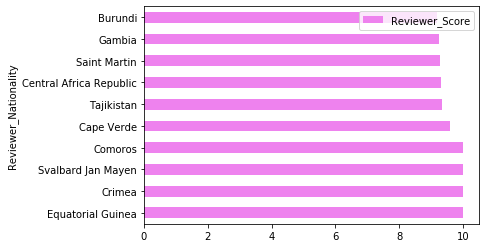

In [30]:
generous_reviewer = df.groupby('Reviewer_Nationality')['Reviewer_Score'].mean().to_frame().reset_index()
generous_reviewer.sort_values('Reviewer_Score',ascending = False).iloc[:10].plot.barh(x ='Reviewer_Nationality', y = 'Reviewer_Score',color = 'violet')

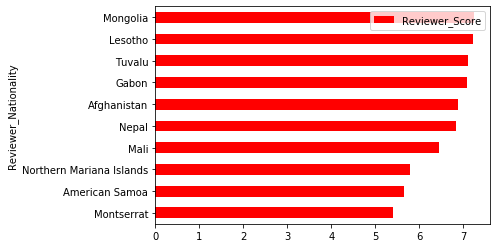

In [31]:
generous_reviewer.sort_values('Reviewer_Score').iloc[:10].plot.barh(x ='Reviewer_Nationality', y = 'Reviewer_Score',color = 'red')

### Tags

In [32]:
df.Tags.nunique()

55242

In [33]:
df.Tags.unique()

array(["[' Leisure trip ', ' Couple ', ' Duplex Double Room ', ' Stayed 6 nights ']",
       "[' Leisure trip ', ' Couple ', ' Duplex Double Room ', ' Stayed 4 nights ']",
       "[' Leisure trip ', ' Family with young children ', ' Duplex Double Room ', ' Stayed 3 nights ', ' Submitted from a mobile device ']",
       ...,
       "[' Leisure trip ', ' Solo traveler ', ' Superior Double Room with Garden View ', ' Stayed 1 night ', ' Submitted from a mobile device ']",
       "[' Business trip ', ' Solo traveler ', ' Superior Double Room with Garden View ', ' Stayed 2 nights ']",
       "[' Leisure trip ', ' Family with young children ', ' Standard Double or Twin Room ', ' Stayed 10 nights ']"],
      dtype=object)

**We will try to separate these tags, since it's a reflection of the circumstances surrounding the use of the hotel, hence they are important factors in the review score.**

In [34]:

df['Leisure'] = df['Tags'].map(lambda x: 1 if ' Leisure trip ' in x else 0)
df['Business'] = df['Tags'].map(lambda x: 2 if ' Business trip ' in x else 0)
df['Trip_type'] = df['Leisure'] + df['Business']


In [35]:
df['Trip_type'].value_counts()

1    417778
2     82939
0     15021
Name: Trip_type, dtype: int64

**Over 15000 rows didnt identify as either leisure or business trip. we will assign assign these rows to the two types of trips according to their proportions.**   

In [36]:
import random
df['Trip_type'] = df[df['Trip_type'] == 0]['Trip_type'].map(lambda x: 1 if random.random() > 0.2 else 2)
df['Trip_type'] = df['Trip_type'].fillna(0)
df['Trip_type'] = df['Trip_type'] + df['Business'] + df['Leisure']
del df['Leisure'] , df['Business']

In [37]:
df['Trip_type'].value_counts()

1.0    429793
2.0     85945
Name: Trip_type, dtype: int64

**80% of these trips are for leisure**

Text(0.5, 1.0, 'Trip Type')

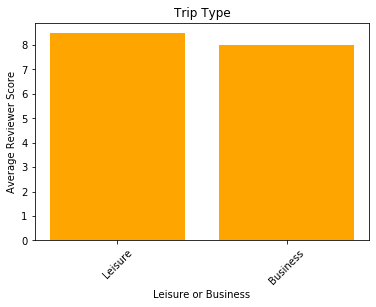

In [38]:
avg_score =df.groupby('Trip_type')['Reviewer_Score'].mean()
Index = [1,2]
plt.bar(Index,avg_score,color='orange')
plt.xticks(Index,['Leisure','Business'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Leisure or Business')
plt.title('Trip Type')

**Those on businesss trips are more critical of the hotels.**

In [39]:
#find tags that contain Couple or Solo or Group or Family_with_older children or Family with younger Children and append corresponding numbers.
df['Solo'] = df['Tags'].map(lambda x: 1 if ' Solo traveler ' in x else 0)
df['Couple'] = df['Tags'].map(lambda x: 2 if ' Couple ' in x else 0)
df['Group'] = df['Tags'].map(lambda x: 3 if ' Group ' in x else 0)
df['Family_with_young_children'] = df['Tags'].map(lambda x: 4 if ' Family with young children ' in x else 0)
df['Family_with_older_children'] = df['Tags'].map(lambda x: 5 if ' Family with older children ' in x else 0)
df['Travelling_Status'] = df['Solo'] + df['Couple'] + df['Group'] + df['Family_with_young_children'] + df['Family_with_older_children']
del df['Solo'], df['Couple'],df['Group'], df['Family_with_young_children'],df['Family_with_older_children']

In [40]:
df['Travelling_Status'].value_counts()

2    252294
1    108545
3     65392
4     61015
5     26349
0      2143
Name: Travelling_Status, dtype: int64

**'0' in this case will represent those with other satus aside the ones listed here.**

Text(0.5, 1.0, 'Trip Type')

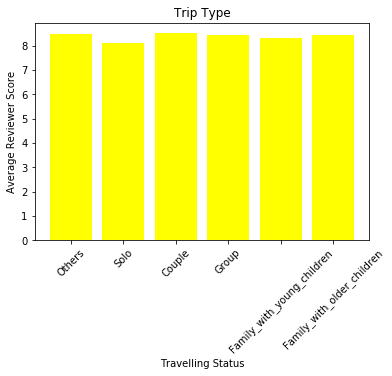

In [41]:
status_avg = df.groupby('Travelling_Status')['Reviewer_Score'].mean()
Index = [0,1,2,3,4,5]
plt.bar(Index,status_avg,color='yellow')
plt.xticks(Index,['Others','Solo','Couple','Group','Family_with_young_children','Family_with_older_children'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Travelling Status')
plt.title('Trip Type')

**Single visitors are the most critical of these group.**

In [42]:
#Duration of Stay
df['Stayed_1_days'] = df['Tags'].map(lambda x: 1 if ' Stayed 1 night ' in x else 0)
df['Stayed_2_days'] = df['Tags'].map(lambda x: 2 if ' Stayed 2 nights ' in x else 0)
df['Stayed_3_days'] = df['Tags'].map(lambda x: 3 if ' Stayed 3 nights ' in x else 0)
df['Stayed_4_days'] = df['Tags'].map(lambda x: 4 if ' Stayed 4 nights ' in x else 0)
df['Stayed_5_days'] = df['Tags'].map(lambda x: 5 if ' Stayed 5 nights ' in x else 0)
df['Stayed_6_days'] = df['Tags'].map(lambda x: 6 if ' Stayed 6 nights ' in x else 0)
df['Stayed_7_days'] = df['Tags'].map(lambda x: 7 if ' Stayed 7 nights ' in x else 0)
df['Stayed_8_days'] = df['Tags'].map(lambda x: 8 if ' Stayed 8 nights ' in x else 0)
df['Stayed_9_days'] = df['Tags'].map(lambda x: 9 if ' Stayed 9 nights ' in x else 0)
df['Stayed_10_days'] = df['Tags'].map(lambda x: 10 if ' Stayed 10 nights ' in x else 0)
df['Stayed_11_days'] = df['Tags'].map(lambda x: 11 if ' Stayed 11 nights ' in x else 0)
df['Stayed_12_days'] = df['Tags'].map(lambda x: 12 if ' Stayed 12 nights ' in x else 0)
df['Stayed_13_days'] = df['Tags'].map(lambda x: 13 if ' Stayed 13 nights ' in x else 0)
df['Stayed_14_days'] = df['Tags'].map(lambda x: 14 if ' Stayed 14 nights ' in x else 0)
df['Stayed_15_days'] = df['Tags'].map(lambda x: 15 if ' Stayed 15 nights ' in x else 0)
df['Stayed_16_days'] = df['Tags'].map(lambda x: 16 if ' Stayed 16 nights ' in x else 0)
df['Stayed_17_days'] = df['Tags'].map(lambda x: 17 if ' Stayed 17 nights ' in x else 0)
df['Stayed_18_days'] = df['Tags'].map(lambda x: 18 if ' Stayed 18 nights ' in x else 0)
df['Stayed_19_days'] = df['Tags'].map(lambda x: 19 if ' Stayed 19 nights ' in x else 0)
df['Stayed_20_days'] = df['Tags'].map(lambda x: 20 if ' Stayed 20 nights ' in x else 0)

**Duration between 1 and 20 days have been replaced with their respective number. Stay more than 20 days was replaced with zero. for convinience, we will assign 21 to them.**

In [43]:
df['stay_duration'] = df['Stayed_1_days'] + df['Stayed_2_days'] + df['Stayed_3_days'] + df['Stayed_4_days'] + df['Stayed_5_days'] + df['Stayed_6_days'] + df['Stayed_7_days'] + df['Stayed_8_days'] + df['Stayed_9_days'] + df['Stayed_10_days'] + df['Stayed_11_days'] + df['Stayed_12_days'] + df['Stayed_13_days'] + df['Stayed_14_days'] + df['Stayed_15_days'] + df['Stayed_16_days'] + df['Stayed_17_days'] + df['Stayed_18_days'] + df['Stayed_19_days'] + df['Stayed_20_days']
del df['Stayed_1_days'] , df['Stayed_2_days'] , df['Stayed_3_days'] , df['Stayed_4_days'], df['Stayed_5_days'] , df['Stayed_6_days'] , df['Stayed_7_days'] , df['Stayed_8_days'] , df['Stayed_9_days'] , df['Stayed_10_days'] , df['Stayed_11_days'] , df['Stayed_12_days'] , df['Stayed_13_days'] , df['Stayed_14_days'] , df['Stayed_15_days'] , df['Stayed_16_days'] , df['Stayed_17_days'] , df['Stayed_18_days'] , df['Stayed_19_days'] , df['Stayed_20_days']

In [44]:
df['stay_duration'] = df['stay_duration'].map(lambda x: 21 if x == 0 else x)

In [45]:
df['stay_duration'].value_counts()

1     193645
2     133937
3      95821
4      47817
5      20845
6       9776
7       7399
8       2502
9       1293
10       889
11       418
12       316
21       290
14       247
13       246
15       117
16        57
17        42
18        33
19        29
20        19
Name: stay_duration, dtype: int64

In [46]:
#Let's check if our numbers tally
df['stay_duration'].count()

515738

In [47]:
df.shape

(515738, 23)

In [48]:
#our numbers check out.

**majority didnt stay for more than 5 days.**

### Negative and Positive Review.

In [49]:
#NLP Negative reviews
negative_comment = []

for comment in df['Negative_Review']:
    only_letters = re.sub("[^a-zA-Z]", " ",comment)
    tokens = nltk.word_tokenize(only_letters)
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #Remove stopwords from the commnts
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result] 
    negative_comment.append(' '.join(lemmas))

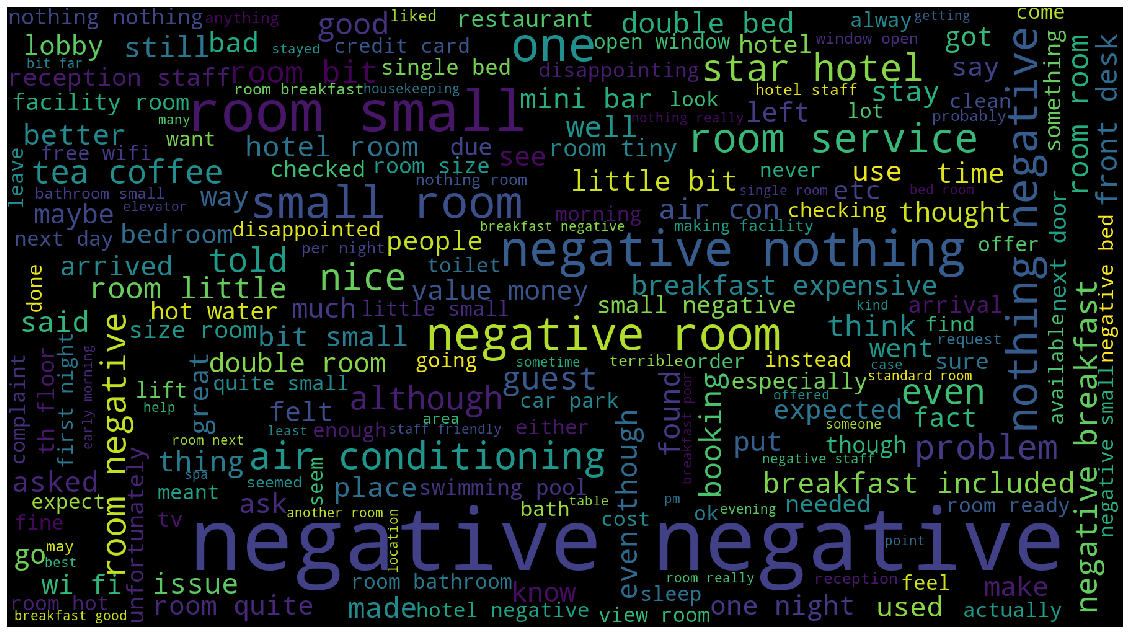

In [50]:
#Let's use worldcloud to visualize the comments
unique_string=(" ").join(negative_comment)
wordcloud = WordCloud(width = 1800, height = 1000).generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

In [51]:
#let us find the most important words in Negative Reviews
cv = CountVectorizer(analyzer = "word",stop_words = 'english',max_features = 20,ngram_range=(2,2))
most_negative_words = cv.fit_transform(negative_comment)
temp1_counts = most_negative_words.sum(axis=0)
temp1_words = cv.vocabulary_

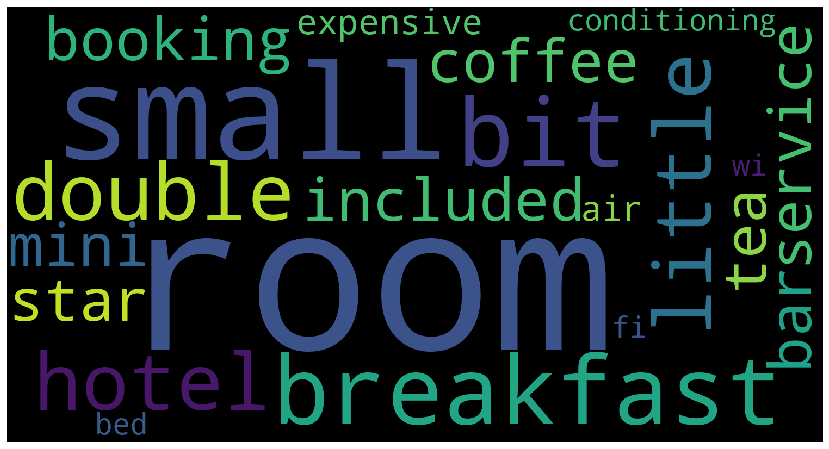

In [52]:
#visualize the most important word with wordcloud
unique_string=(" ").join(temp1_words)
wordcloud = WordCloud(width = 1500, height = 800).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

**We will create new columns for these frequent words since thy form the basis of negative reviews.**

In [53]:
#air-conditioning
air_conditioning = np.zeros(len(df)) #create an array of zeros
for i in range(len(df)):
 #Change the elements in the array that satisfy the conditions to 1.    
    if ("air conditioning" in negative_comment[i]) or ("air conditioner" in negative_comment[i]) : 
        air_conditioning[i] = 1
np.sum(air_conditioning)

6375.0

In [54]:
#breakfast
breakfast = np.zeros(len(df))
for i in range(len(df)):
    if ("breakfast expensive" in negative_comment[i]) or ("breakfast included" in negative_comment[i]) or ("breakfast room" in negative_comment[i]) or ("tea coffee" in negative_comment[i]) or ("breakfast little" in negative_comment[i]) or ("little breakfast" in negative_comment[i]): 
        breakfast[i] = 1
np.sum(breakfast)

12186.0

In [55]:
#small room
small_room = np.zeros(len(df))
for i in range(len(df)):
    if ("room small" in negative_comment[i]) or ("small room" in negative_comment[i]) or ("room bit small" in negative_comment[i])  or ("room bit little" in negative_comment[i]):
        small_room[i] = 1
np.sum(small_room)

23738.0

In [56]:
#wi-fi
wi_fi = np.zeros(len(df))
for i in range(len(df)):
    if ("wi fi" in negative_comment[i]):
        wi_fi[i] = 1
np.sum(wi_fi)        

2297.0

In [57]:
#room_problem
room_problem = np.zeros(len(df))
for i in range(len(df)):
    if ("mini bar" in negative_comment[i]) or ("room service" in negative_comment[i]) or ("double bed" in negative_comment[i]) or ("double room" in negative_comment[i]): 
        room_problem[i] = 1
np.sum(room_problem)

13518.0

In [58]:
#booking
booking_com = np.zeros(len(df))
for i in range(len(df)):
    if ("booking com" in negative_comment[i]): 
        booking_com[i] = 1
np.sum(booking_com)

3919.0

In [59]:
#NLP for Positive Reviews
positive_comment = []

for comment in df['Positive_Review']:
    only_letters2 = re.sub("[^a-zA-Z]", " ",comment)
    tokens2 = nltk.word_tokenize(only_letters2)
    lower_case2 = [l.lower() for l in tokens2]
    filtered_result2 = list(filter(lambda l: l not in stop_words, lower_case2)) #filter out stopwords
    lemmas2 = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result2] 
    positive_comment.append(' '.join(lemmas2))

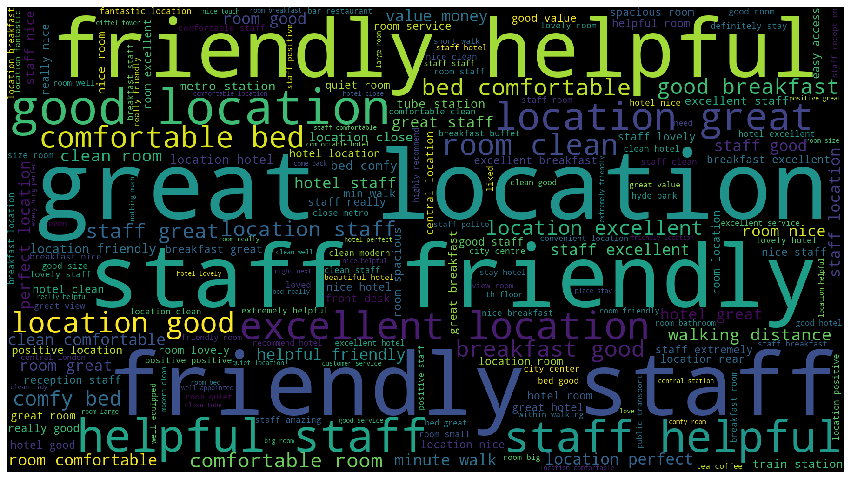

In [60]:
unique_string2=(" ").join(positive_comment)
wordcloud = WordCloud(width = 1800, height = 1000).generate(unique_string2)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

In [61]:
#Let us get the most important words in Positive Reviews
cv2 = CountVectorizer(analyzer = "word",stop_words = 'english',max_features = 20,ngram_range=(2,2))
most_positive_words = cv2.fit_transform(positive_comment)
temp2_counts = most_positive_words.sum(axis=0)
temp2_words = cv2.vocabulary_

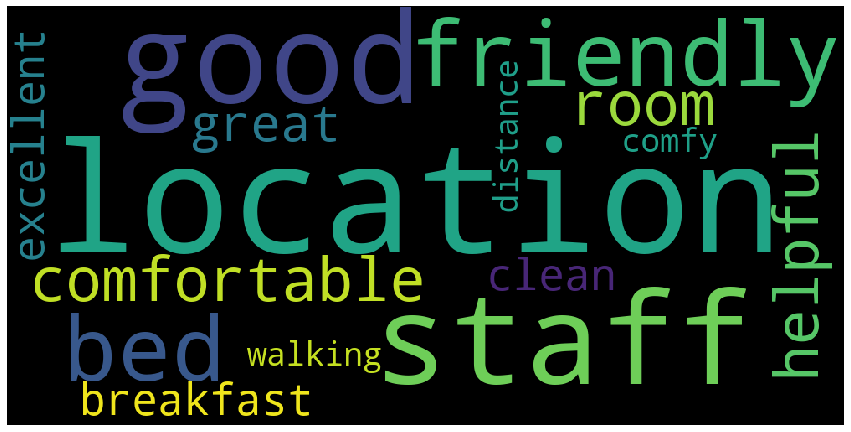

In [62]:
#wordcloud for important words in postive review
unique_string3=(" ").join(temp2_words)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string3)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

**We will also create different columns from positive reviews based on the most important words.**

In [63]:
#Location
location = np.zeros(len(df))
for i in range(len(df)):
    if ("good location" in positive_comment[i]) or ("great location" in positive_comment[i]) or ("location close" in positive_comment[i]) or ("location excellent" in positive_comment[i]) or ("location great" in positive_comment[i]) or ("location good" in positive_comment[i]) or ("walking distance" in positive_comment[i]) or ("excellent location" in positive_comment[i]) or ("location good" in positive_comment[i]) or ("perfect location" in positive_comment[i]): 
        location[i] = 1
np.sum(location)

99136.0

In [64]:
#Staff
staff = np.zeros(len(df))
for i in range(len(df)):
    if ("friendly helpful" in positive_comment[i]) or ("friendly staff" in positive_comment[i]) or ("helpful staff" in positive_comment[i]) or ("staff helpful" in positive_comment[i]) or ("staff friendly" in positive_comment[i]): 
        staff[i] = 1
np.sum(staff)

88340.0

In [65]:
#bed and room
bed_and_room = np.zeros(len(df))
for i in range(len(df)):
    if ("bed comfortable" in positive_comment[i]) or ("clean room" in positive_comment[i])  or ("room spacious" in positive_comment[i]) or ("comfortable bed" in positive_comment[i]) or ("comfortable room" in positive_comment[i]) or ("comfy bed" in positive_comment[i]) or ("room clean" in positive_comment[i]) :
        bed_and_room[i] = 1
np.sum(bed_and_room)

60777.0

In [66]:
#breakfast
#the 'breakfast' list has alrady ben created earlier. To avoid confusion, we will append 2 to positive breakfast commnts.
for i in range(len(df)):
    if ("breakfast good" in positive_comment[i]) or ("good breakfast" in positive_comment[i]): 
        breakfast[i] = breakfast[i]+ 2
np.sum(breakfast) #This is not a reflection of the number of reviews with positive breakfast comment. The array contains both positive and negative reviews, assigned to 2 and 1 respectively. 

47394.0

In [67]:
#Let combine the extracted data with the main dataframe.
df['room_small'] = small_room
df['wi_fi'] = wi_fi
df['air_conditioning'] = air_conditioning
df['breakfast'] = breakfast
df['booking_com'] = booking_com
df['room_problem'] = room_problem
df['location'] = location
df['staff'] = staff
df['bed_and_room'] = bed_and_room

In [68]:
df.shape

(515738, 32)

In [69]:
df.breakfast.unique()

array([0., 1., 2., 3.])

**let us visualize these new columns.**

Text(0.5, 1.0, 'Small Room')

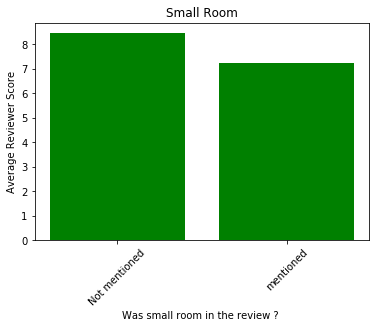

In [70]:
##Small Room
sr_avg=df.groupby('room_small')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,sr_avg,color='green')
plt.xticks(Index,['Not mentioned','mentioned'],rotation=45) 
plt.ylabel('Average Reviewer Score')
plt.xlabel('Was small room in the review ? ')
plt.title('Small Room')

Text(0.5, 1.0, 'Air Conditioning')

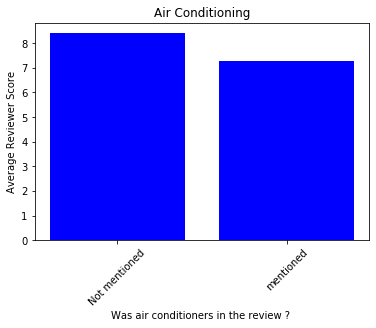

In [71]:
##Air_conditioners
ac_avg=df.groupby('air_conditioning')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,ac_avg,color='blue')
plt.xticks(Index,['Not mentioned','mentioned'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Was air conditioners in the review ? ')
plt.title('Air Conditioning')

Text(0.5, 1.0, 'Room Problem')

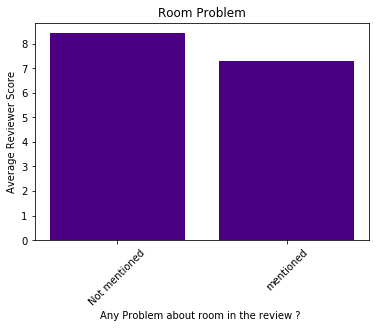

In [72]:
#room problem
rp_avg=df.groupby('room_problem')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,rp_avg,color='indigo')
plt.xticks(Index,['Not mentioned','mentioned'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Any Problem about room in the review ? ')
plt.title('Room Problem')

Text(0.5, 1.0, 'Wifi')

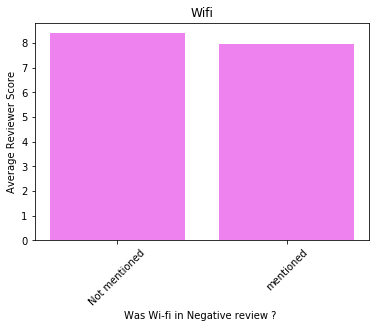

In [73]:
#Wi-fi
wifi_avg=df.groupby('wi_fi')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,wifi_avg,color='violet')
plt.xticks(Index,['Not mentioned','mentioned'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Was Wi-fi in Negative review ? ')
plt.title('Wifi')

Text(0.5, 1.0, 'Booking.com In Negative Review')

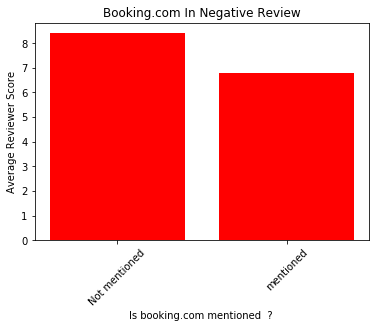

In [74]:
#Booking.com
booking_avg=df.groupby('booking_com')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,booking_avg, color = 'red')
plt.xticks(Index,['Not mentioned','mentioned'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Is booking.com mentioned  ? ')
plt.title('Booking.com In Negative Review')

**For all the columns we extracted from negative reviews, we can see from above that average reviewer scored dropped below 7 when they are mentioned, as against when they are not mentioned, in which the average score is more than. This shows the negative impact of negative reviews on reviewer score.**



**Wi-fi seems not to have a pronunced negative effect.  Although it lead to reduction in reviewer score, its impact is not as pronunced as others.**

Text(0.5, 1.0, 'Staff')

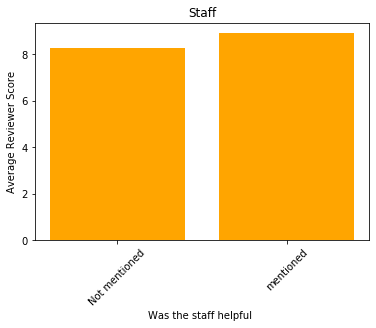

In [76]:
##Staff
st_avg=df.groupby('staff')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,st_avg,color='orange')
plt.xticks(Index,['Not mentioned','mentioned'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Was the staff helpful ')
plt.title('Staff')

Text(0.5, 1.0, 'Bed and Room')

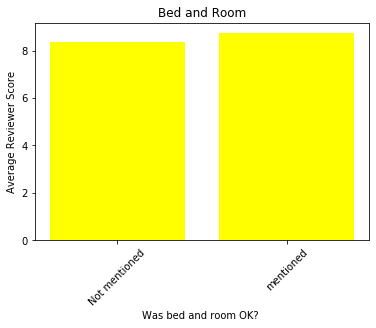

In [77]:
##Bed_and_Room
br_avg=df.groupby('bed_and_room')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,br_avg,color='yellow')
plt.xticks(Index,['Not mentioned','mentioned'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Was bed and room OK? ')
plt.title('Bed and Room')

**There is an increase in Average reviewer score when there's a positive review. An interesting thing to note is that the score doesn't necesarilly dropped when these important words are not mentioned. This shows that while the absence of a positive review might not necesarily reduce reviewer's score, the presence of it will surely improve it. To put it in perspective, most of, if not all, the reviewed hotels are in great locations.Negative reviews, therefore, are not expected. It will, however, take an hotel to be located at an exceptionally great location for it to attract a positive location review. This will apparently improve rating score but has little odds of reducing it.**

Text(0.5, 1.0, 'Breakfast')

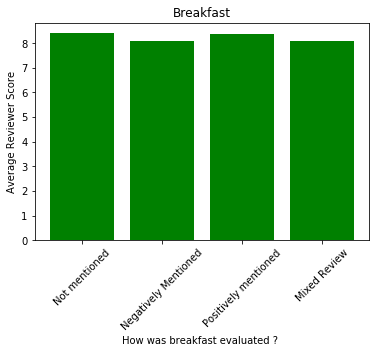

In [79]:
##Breakfast
bf_avg=df.groupby('breakfast')['Reviewer_Score'].mean()
Index = [0,1,2,3]
plt.bar(Index,bf_avg,color='green')
plt.xticks(Index,['Not mentioned','Negatively Mentioned','Positively mentioned', 'Mixed Review'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('How was breakfast evaluated ? ')
plt.title('Breakfast')

**Mixed review is as good as negative review.**

## Review Date

In [80]:
#Lets get year and month infos
year = df['Review_Date'].map(lambda x: x.split('/')[2])
month = df['Review_Date'].map(lambda x: x.split('/')[0])
df['month'] = month
df['year'] = year

In [81]:
df['year'].unique()

array(['2017', '2016', '2015'], dtype=object)

In [82]:
def date_plot(year):
    year = df[df['year']==year]
    most = year.groupby('month')['Reviewer_Score'].count().to_frame().reset_index().sort_values('Reviewer_Score')
    return most

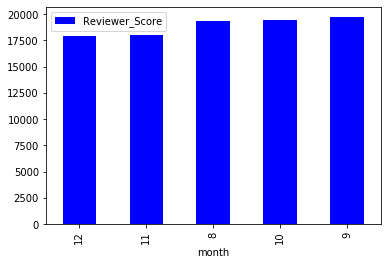

In [84]:
date_plot('2015').plot.bar(x= 'month', color ='blue')

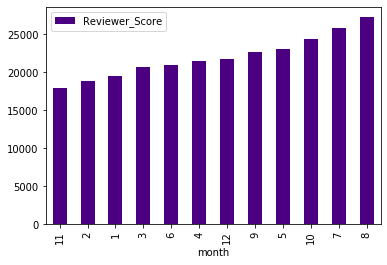

In [85]:
date_plot('2016').plot.bar(x= 'month', color ='indigo')

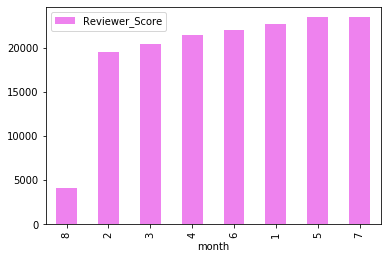

In [86]:
date_plot('2017').plot.bar(x= 'month', color ='violet')

**The data span through the period of august, 2015 to august 2017. It is obvious that we cannot fully extablish a trend from the plots above**

**To be able to derive some insights, lets look at plot for the general time span** 

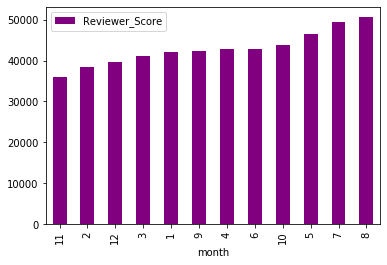

In [88]:
general = df.groupby('month')['Reviewer_Score'].count().reset_index().sort_values('Reviewer_Score')
general.plot.bar(x='month', color = 'purple')

**Hotel business seems to pick during the summer months.**

## Correlation among columns

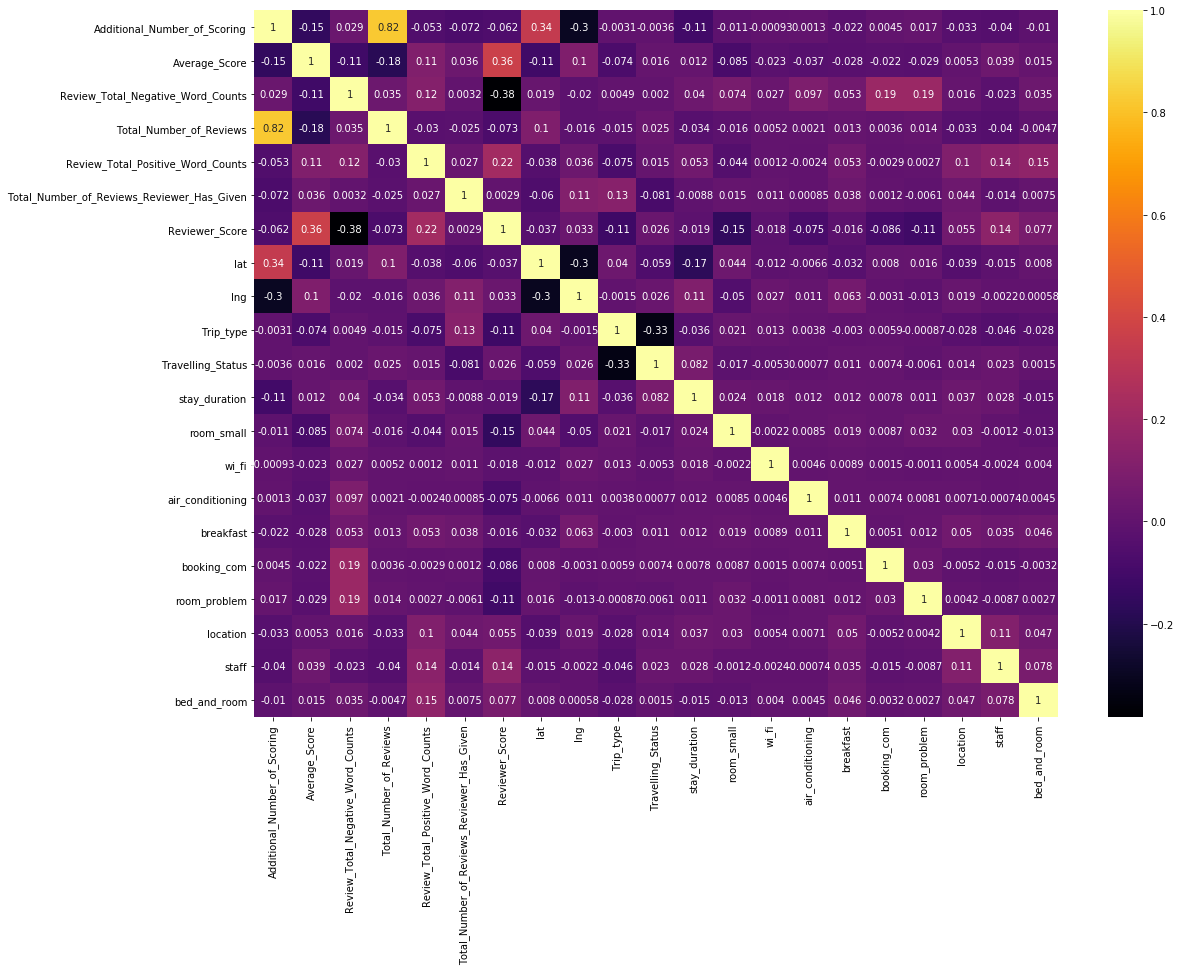

In [89]:
f,ax = plt.subplots(figsize=(18,13))

#Draw the heatmap for the correlation of the columns
sns.heatmap(df.corr(), cmap='inferno', annot=True)